In [1]:
from confirm.outlaw.nb_util import setup_nb

setup_nb()

import matplotlib.pyplot as plt
import scipy.stats
import jax
import jax.numpy as jnp
import numpy as np

import confirm.imprint as ip
from confirm.models.binom1d import Binom1D

## Binomial

0.19999999999999996


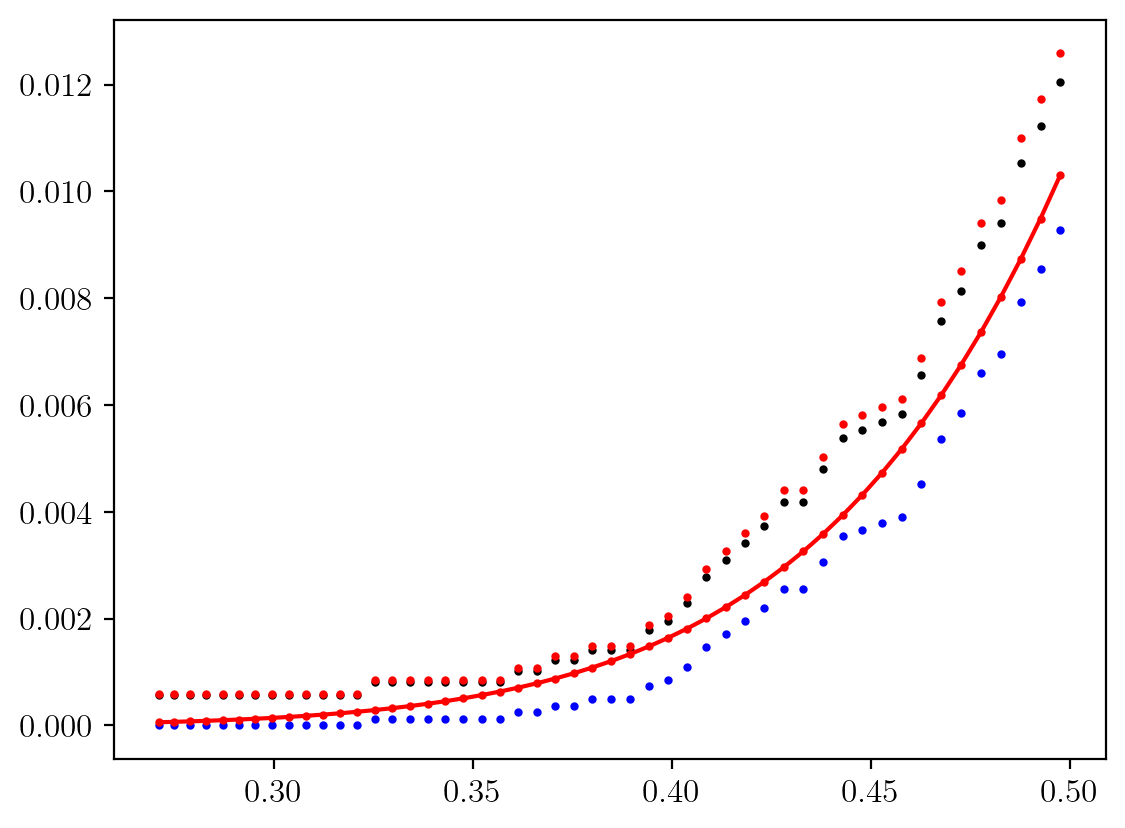

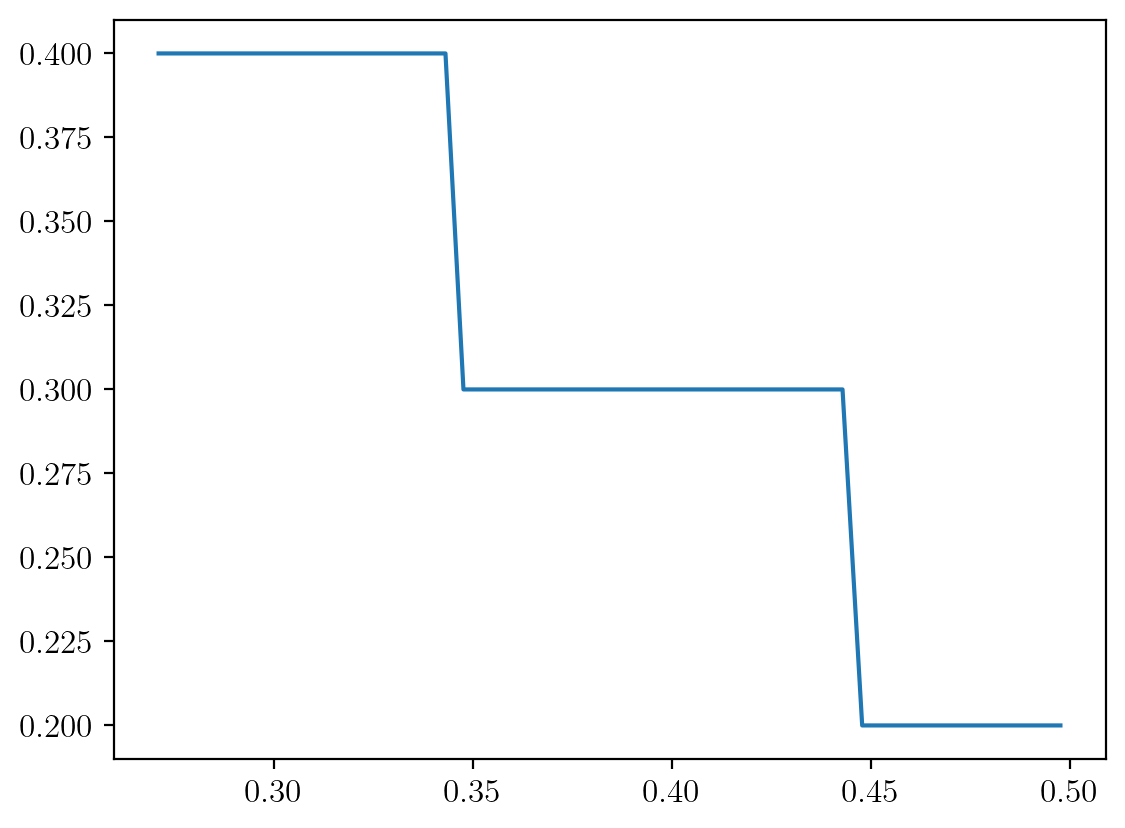

In [2]:
g = ip.cartesian_grid([-1], [1], n=[100], null_hypos=[ip.hypo("x < 0")])
tune_df = ip.tune(Binom1D, g, model_kwargs=dict(n_arm_samples=10))
lam = tune_df["lams"].min()
print(lam)

K = 8192
rej_df = ip.validate(Binom1D, g, lam, K=K, model_kwargs=dict(n_arm_samples=10))
p = scipy.special.expit(g.get_theta()[:, 0])
true_err = scipy.stats.binom.cdf(lam * 10, 10, 1 - p)

plt.plot(p, rej_df["tie_est"], "bo", markersize=2)
plt.plot(p, rej_df["tie_cp_bound"], "ko", markersize=2)
plt.plot(p, rej_df["tie_bound"], "ro", markersize=2)
plt.plot(p, true_err, "r-o", markersize=2)
plt.show()
plt.plot(p, tune_df["lams"])
plt.show()

In [3]:
iter, reports, ada = ip.ada_calibrate(Binom1D, g=g, model_kwargs=dict(n_arm_samples=10))

{
    'i': 1,
    'bias_tie': '0.000000',
    'std_tie': '0.000000',
    'spread_tie': '0.000000',
    'grid_cost': '0.001009',
    'lamss': '0.200000',
    'min(B_lamss)': '0.200000',
    'max(B_lamss)': '0.200000',
    'tie_{k}(lamss)': '0.003662',
    'tie + slack': '0.004671',
    'n_impossible': 0,
    'runtime_convergence_check': '0.195671',
    'runtime_refine_deepen': '0.329760',
    'runtime_processing': '0.837091',
    'n_refine': 8,
    'n_deepen': 42,
    'n_complete': 0
}

{
    'i': 2,
    'bias_tie': '0.000000',
    'std_tie': '0.000000',
    'spread_tie': '0.000000',
    'grid_cost': '0.000507',
    'lamss': '0.200000',
    'min(B_lamss)': '0.200000',
    'max(B_lamss)': '0.200000',
    'tie_{k}(lamss)': '0.004395',
    'tie + slack': '0.004902',
    'n_impossible': 0,
    'runtime_convergence_check': '0.016270'
}